# Unsupervised learning
## Visualization with PCA
### Using scikit-learn

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

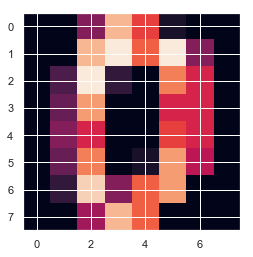

In [4]:
plt.imshow(digits.images[0])

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [3]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


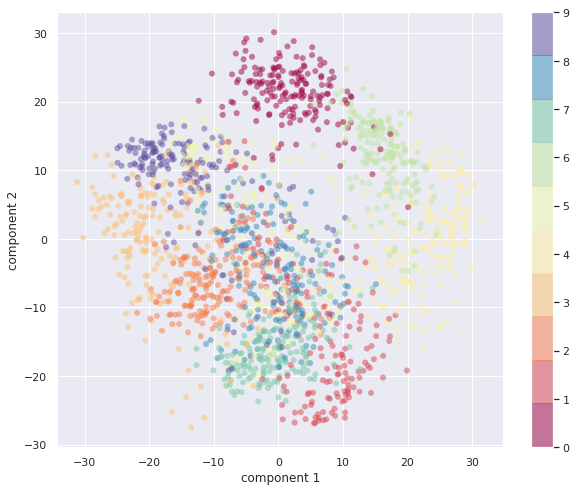

In [4]:
fig=plt.figure(figsize=(10,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [5]:
projected[:10,0]

array([ -1.25946448,   7.95761171,   6.99192085, -15.90610098,
        23.30686037, -14.08708499,  21.36340479,  -2.95261167,
        -5.25513947,  -5.48020677])

In [6]:
projected[:10,1]

array([ 21.27488012, -20.76870214,  -9.95597983,   3.33245813,
         4.26906893,   7.91444472,   5.28834173, -21.07165334,
         1.18336359,   8.07632782])

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Using Numpy
The scikit-learn's PCA() function uses single value decomposition (SVD) to decompose X into three matrices. Here, we'll replicate it by using numpy library. 

In [8]:
X = digits.data
y= digits.target

In [9]:
Xc = X-X.mean(axis=0)

In [10]:
U, s, V = np.linalg.svd(Xc)

In [11]:
U.shape

(1797, 1797)

In [12]:
s.shape

(64,)

In [13]:
V.shape

(64, 64)

In [14]:
c1 = V.T[:,0]
c2 = V.T[:,1]

In [15]:
c1.shape

(64,)

In [16]:
c1[:10]

array([ 1.77484909e-19,  1.73094651e-02,  2.23428835e-01,  1.35913304e-01,
        3.30323092e-02,  9.66340844e-02,  8.32943805e-03, -2.26900082e-03,
        3.20516495e-04,  1.19308905e-01])

In [17]:
print(c1.max(),c1.mean(),c1.min())

0.24445167558025468 -0.0012142980041591114 -0.3686907738156656


In [18]:
W2 = V.T[:,:2]

In [19]:
W2.shape

(64, 2)

In [20]:
X_proj2d = Xc.dot(W2) 

In [21]:
X_proj2d.shape #X dimension reduced (projected) to 2d

(1797, 2)

In [22]:
X_proj2d[:10,0]

array([  1.25946645,  -7.9576113 ,  -6.99192297,  15.90610526,
       -23.30686741,  14.08708639, -21.36340953,   2.95260696,
         5.25513426,   5.48019882])

In [23]:
X_proj2d[:10,1]

array([-21.27488348,  20.76869896,   9.95598641,  -3.33246429,
        -4.26906083,  -7.91444848,  -5.28833968,  21.07166429,
        -1.18335991,  -8.07632417])

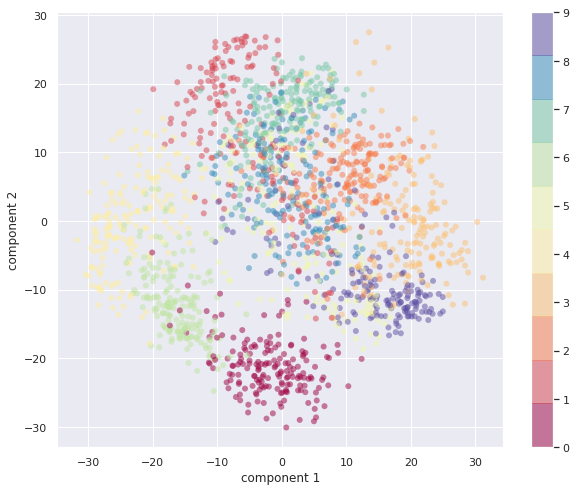

In [24]:
fig=plt.figure(figsize=(10,8))
plt.scatter(X_proj2d[:, 0], X_proj2d[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(); #the signs are flipped for both axis 1 and 2 comapred to the first method, but they are essentially the same

# Dimensionality Reduction
### Where to stop?
How do we choose the dimension to project? For visualization, there is less choice but to have 2D or 3D. But for dimensionality reduction of the training data, typically we can choose sufficient dimension using elbow plot.

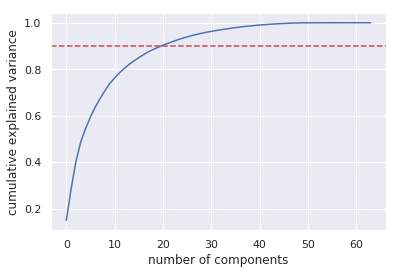

In [25]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=0.9,c='r',ls='--')
#about 20 dimensions will capture 90% portion of the variance

# Regression using PCA
We'll see an example of preprocessing for regression using PCA. This is called PCR.

In [26]:
import pandas as pd
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
df = pd.read_csv('hitters.csv').dropna().drop('Unnamed: 0', axis=1)
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [34]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [35]:
X_reduced.shape

(263, 19)

In [36]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

0         1         2         3         4         5
0  0.198290 -0.383784  0.088626  0.031967  0.028117 -0.070646
1  0.195861 -0.377271  0.074032  0.017982 -0.004652 -0.082240
2  0.204369 -0.237136 -0.216186 -0.235831  0.077660 -0.149646
3  0.198337 -0.377721 -0.017166 -0.049942 -0.038536 -0.136660
4  0.235174 -0.314531 -0.073085 -0.138985  0.024299 -0.111675

no PCA [236971.07140908274]


/home/geena/anaconda3/envs/skl22dev/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


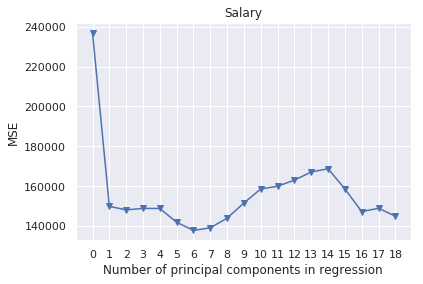

In [38]:
# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))

# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
print('no PCA',mse)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, X.shape[-1]):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(np.arange(0,X.shape[-1],1),mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)
plt.xticks(np.arange(0,X.shape[-1], step=1));

In [39]:
pca.components_.shape

(19, 19)

In [40]:
pca.explained_variance_

array([7.64372744e+00, 4.11696235e+00, 2.29388398e+00, 1.41688318e+00,
       1.05914757e+00, 7.29698239e-01, 6.21262722e-01, 4.60240162e-01,
       1.99578669e-01, 1.79052225e-01, 1.22389481e-01, 7.86828244e-02,
       7.02583683e-02, 6.15884582e-02, 4.87277862e-02, 2.72871676e-02,
       1.13392228e-02, 4.83824347e-03, 6.05758486e-04])

In [41]:
pca.explained_variance_ratio_

array([3.99230441e-01, 2.15028166e-01, 1.19809127e-01, 7.40035408e-02,
       5.53190775e-02, 3.81120012e-02, 3.24484347e-02, 2.40382568e-02,
       1.04239562e-02, 9.35186390e-03, 6.39237949e-03, 4.10958906e-03,
       3.66958131e-03, 3.21675354e-03, 2.54504307e-03, 1.42520361e-03,
       5.92245465e-04, 2.52700543e-04, 3.16386513e-05])

# Exercise
Use the brain tumor data (use braintumor.p in the HW1) to perform PCA and clustering
#### 1.a Compare the survival prediction results using linear regression vs. PCR
#### 1.b What is the optimal number of principal components? 
#### 1.c Which feature(s) are most importatnt?
#### 2.a Perform clustering analysis on X (X should not have labels such as survival and type) 
#### 2.b How many clusters have you found? What is your interpretation?